In [3]:
import pandas as pd
import seaborn as sns


In [3]:
!pwd

/storage/store/work/lgrinszt/TabPFN/tabpfn


In [4]:
results = pd.read_csv('results.csv')

In [5]:
results["model"].unique()

array(['Random Forest', 'Gradient Boosting', 'Logistic Regression',
       'TabPFN', 'TabPFNne', 'default35970_260', 'trees13368_60',
       'trees456_390', 'trees66554_75', 'mlp60400_160', 'mlp71353_400',
       'trees13368_60_no_prepro', 'trees456_390_no_prepro',
       'trees13368_60_no_prepro2', 'trees456_390_no_prepro2',
       'TabPFNno_prepro', 'default35702_250_no_prepro2',
       'trees79428_250_no_prepro2', 'default35702_250', 'trees79428_250',
       'trees13368_15'], dtype=object)

In [60]:
results = pd.read_csv('tabpfn/results_benchmark.csv')
results = results[results["metric"] == "accuracy"]
results["accuracy"] = results["value"]
results = results[results["suite_id"] == "334"]
# results_large["suite_id"] = "337"
# results_large["model"] = results_large["model"] + "_large"
# # replce model "checkpoint" by trees
# results = pd.concat([results, results_large])
# results = results[results["suite_id"] == "337"]

In [69]:
#models_to_show = ["trees13060_u0ncvfl9_400", "trees7329_6qspdk92_400", "trees97149_stz4qj1z_180", "trees676_obqe7mfl_350", "trees10182_38zv803x_320_no_norm", "tabpfn", "gbt"]
#models_to_show = ["trees676_obqe7mfl_350", "trees13060_u0ncvfl9_400", "tabpfn", "gbt", "tabpfn_trees676_obqe7mfl_350_no_prepro", "tabpfn_trees10558_8fbxi6ds_400", "tabpfn_trees88370_i6pdh6lo_350", "tabpfn_trees10558_8fbxi6ds_400_prepro"]
models_to_show = ["tabpfn_trees88370_i6pdh6lo_350", "tabpfn", "gbt", "tabpfn_trees10558_8fbxi6ds_400"]

In [20]:
results["model"].unique()

array(['tabpfn_trees13368_60', 'checkpoint', 'trees24451_220',
       'trees55166_49voozm8_390', 'trees69859_eouc70o7_390',
       'trees55166_49voozm8_220', 'trees69859_eouc70o7_390prepro',
       'trees69859_eouc70o7_390_random_rotation',
       'tabpfn_random_rotation', 'gbt_random_rotation', 'log_reg',
       'mlp_sklearn', 'trees73904_ba9wuzhe_390', 'trees4315_080m7u0l_390',
       'trees97149_stz4qj1z_180', 'trees7329_6qspdk92_400',
       'trees676_obqe7mfl_350', 'trees676_obqe7mfl_350_no_norm',
       'trees83490_bbldubv2_350_no_norm',
       'trees57114_9gx20nsw_370_no_norm',
       'trees10182_38zv803x_320_no_norm', 'trees13060_u0ncvfl9_400',
       'tabpfn', 'gbt', 'tabpfn_trees10558_8fbxi6ds_400',
       'tabpfn_trees88370_i6pdh6lo_350',
       'tabpfn_trees10558_8fbxi6ds_400_prepro'], dtype=object)

In [ ]:
pivoted = results.pivot(index=None, columns='metric', values='value')

In [ ]:
results

In [ ]:
pivoted.fillna(method='ffill').columns

In [ ]:
pivoted.fillna(method='ffill').drop_duplicates(subset=["accuracy", "roc_auc"])

In [ ]:
results_337 = results[results["suite_id"] == "337"]
results_334 = results[results["suite_id"] == "334"]
results_cc18 = results[results["suite_id"] == "cc18"]

In [ ]:
results_337.head()

In [ ]:
results[results["model"].isin(["tabpfn_trees13368_60", "tabpfn", "gbt"])]

In [10]:
results["model"].unique()

array(['tabpfn_trees13368_60', 'tabpfn', 'gbt', 'checkpoint'],
      dtype=object)

<Axes: xlabel='task_id', ylabel='accuracy'>

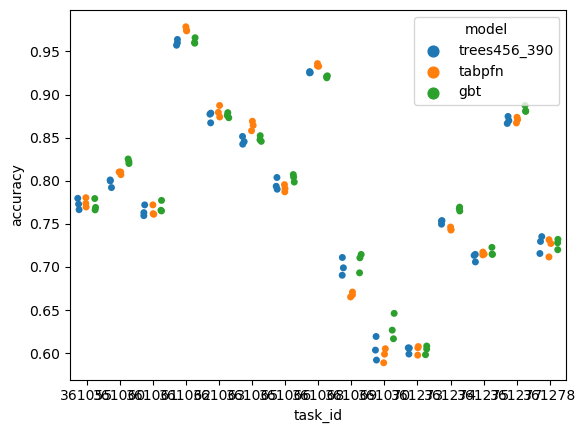

In [51]:
#ax = sns.boxplot(x="task_id", y="value", hue="model", data=results_337[results_337["metric"] == "accuracy"], palette="Set3")
# replace by scatterplot
results["task_id"] = results["task_id"].astype(str)
sns.stripplot(x="task_id", y="accuracy", hue="model", 
              data=results[results["model"].isin(["tabpfn", "tabpfn_large", "gbt", "gbt_large", "checkpoint", "trees456_390_large", "trees456_390"])],
              dodge=True)

In [33]:
results["task_id"].unique()

array(['361055', '361060', '361061', '361062', '361063', '361065',
       '361066', '361068', '361069', '361070', '361273', '361274',
       '361275', '361277', '361278'], dtype=object)

,Unnamed: 0.13,Unnamed: 0.12,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,...,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,suite_id,task_id,seed,metric,value,model,accuracy
2232,2232,2232.0,2232.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361055,0,accuracy,0.765931,trees69859_eouc70o7_390,0.765931
2234,2234,2234.0,2234.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361055,1,accuracy,0.761809,trees69859_eouc70o7_390,0.761809
2236,2236,2236.0,2236.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361055,2,accuracy,0.751894,trees69859_eouc70o7_390,0.751894
2238,2238,2238.0,2238.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361060,0,accuracy,0.782754,trees69859_eouc70o7_390,0.782754
2240,2240,2240.0,2240.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361060,1,accuracy,0.778743,trees69859_eouc70o7_390,0.778743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361277,1,accuracy,0.786208,trees69859_eouc70o7_390_random_rotation,0.786208
3250,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361277,2,accuracy,0.778966,trees69859_eouc70o7_390_random_rotation,0.778966
3252,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361278,0,accuracy,0.686832,trees69859_eouc70o7_390_random_rotation,0.686832
3254,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,337,361278,1,accuracy,0.680704,trees69859_eouc70o7_390_random_rotation,0.680704


<Axes: xlabel='accuracy', ylabel='task_id'>

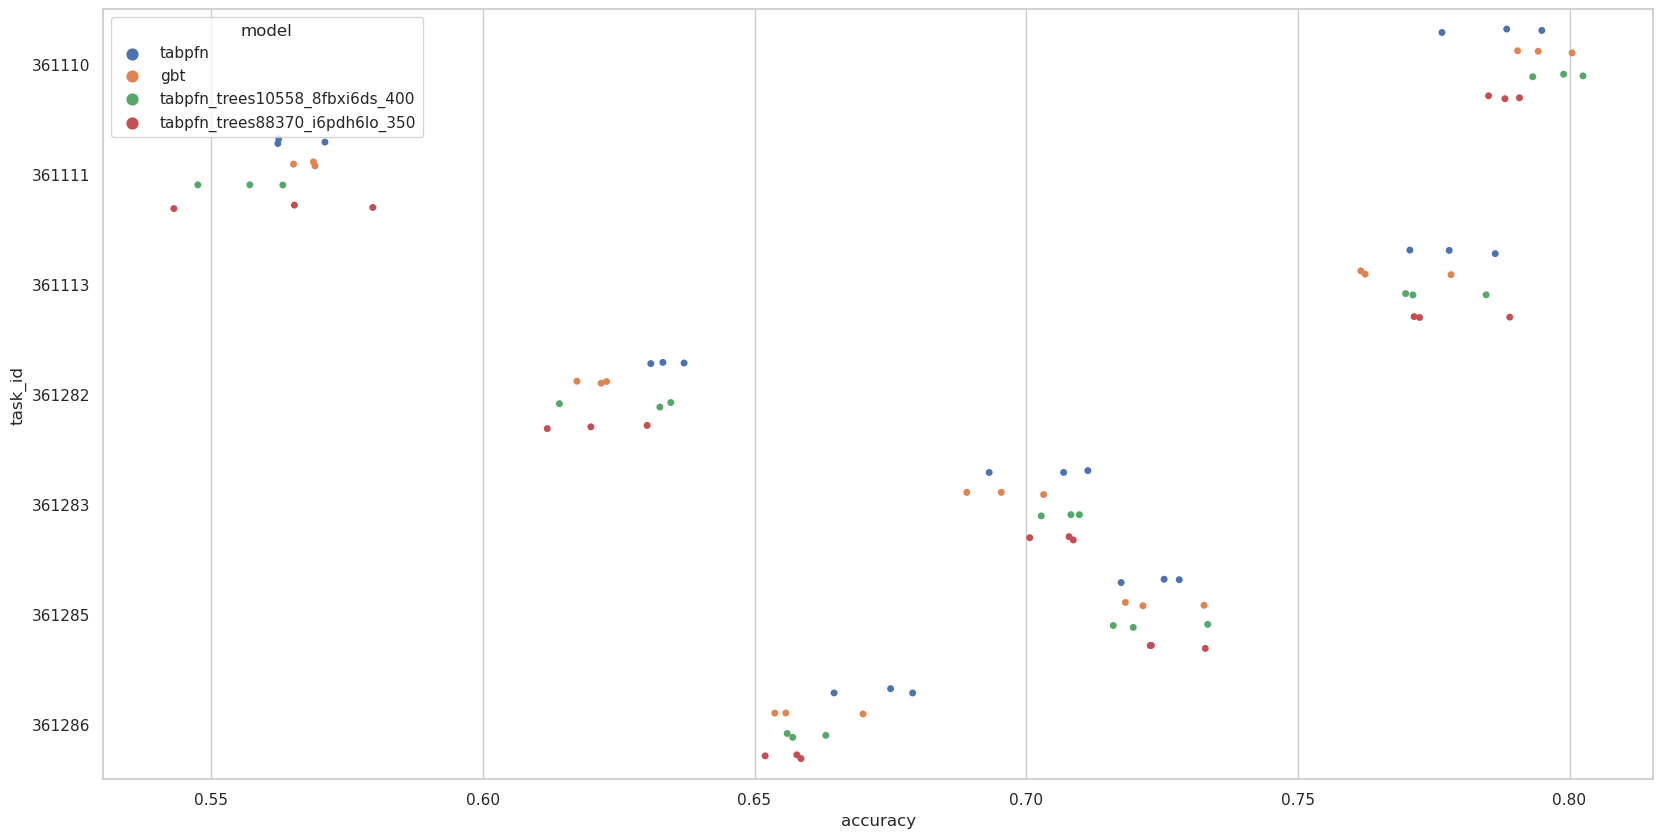

In [70]:
# plot the results
# score in y
# task_id in x
# hue is the model
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
# bigger plot
plt.figure(figsize=(20, 10))
# accuracy

#ax = sns.boxplot(x="task_id", y="value", hue="model", data=results_337[results_337["metric"] == "accuracy"], palette="Set3")
# replace by scatterplot
results["task_id"] = results["task_id"].astype(str)
sns.stripplot(y="task_id", x="accuracy", hue="model", 
              #data=results[results["model"].isin(["trees69859_eouc70o7_390", "trees69859_eouc70o7_390_random_rotation", "tabpfn", "tabpfn_random_rotation", "gbt", "gbt_random_rotation"])],
              #data=results[results["model"].isin(["trees73904_ba9wuzhe_390", "trees4315_080m7u0l_390", "trees69859_eouc70o7_390", "trees676_obqe7mfl_350", "tabpfn", "gbt", "log_reg"])],
              data=results[results["model"].isin(models_to_show)],
              dodge=True)
# plot horizontal lines for the different tasks
# unique_tasks = results["task_id"].unique()
# for task in unique_tasks:
#     task_index = list(unique_tasks).index(task)
#     if int(task) in datasets_with_more_than_two_classes:
#         plt.axhline(y=task_index + 0.5, color='red', linestyle='--', linewidth=0.7)
#     else:
#         plt.axhline(y=task_index + 0.5, color='grey', linestyle='--', linewidth=0.7)

In [71]:
# Compute mean rank of each model
#results = results_337[results_337["metric"] == "accuracy"]
# group by model and task_id, and compute the mean accuracy
mean_acc = results[results["model"].isin(models_to_show)].groupby(['model', 'task_id']).mean()


# sort the resulting dataframe by model and accuracy
sorted_acc = mean_acc.sort_values(['model', 'value'], ascending=[True, False])

# assign ranks to each model based on sorted order of accuracy
sorted_acc['rank'] = sorted_acc.groupby('task_id')['value'].rank(method='dense', ascending=False)


# compute the mean rank for each model
mean_rank = sorted_acc.groupby('model')['rank'].mean()

mean_rank

/tmp/ipykernel_3965/2866083971.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_acc = results[results["model"].isin(models_to_show)].groupby(['model', 'task_id']).mean()


model
gbt                               2.714286
tabpfn                            2.142857
tabpfn_trees10558_8fbxi6ds_400    2.571429
tabpfn_trees88370_i6pdh6lo_350    2.571429
Name: rank, dtype: float64

In [72]:
import pandas as pd

# compute the maximum and minimum accuracy for each task
task_acc_range = results[results["model"].isin(models_to_show)].groupby('task_id')['accuracy'].agg(['max', 'min'])

# merge the maximum and minimum accuracy with the original dataframe
merged_df = pd.merge(results[results["model"].isin(models_to_show)], task_acc_range, on='task_id')

# compute the range of accuracy for each task
merged_df['range'] = merged_df['max'] - merged_df['min']

# compute the normalized accuracy for each task
merged_df['normalized_accuracy'] = (merged_df['accuracy'] - merged_df['min']) / merged_df['range']

# compute the mean normalized accuracy for each model
mean_normalized_acc = merged_df.groupby('model')['normalized_accuracy'].mean()

print(mean_normalized_acc)


model
gbt                               0.429785
tabpfn                            0.620322
tabpfn_trees10558_8fbxi6ds_400    0.534593
tabpfn_trees88370_i6pdh6lo_350    0.485946
Name: normalized_accuracy, dtype: float64


In [198]:
#print dataset quality
dataset_id = 1050
dataset = openml.datasets.get_dataset(dataset_id)
print("Dataset id: %d" % dataset_id)
print("Dataset name: %s" % dataset.name)
print(dataset.qualities)

Dataset id: 1050
Dataset name: pc3
{'AutoCorrelation': 0.8143405889884763, 'CfsSubsetEval_DecisionStumpAUC': 0.49982181040627227, 'CfsSubsetEval_DecisionStumpErrRate': 0.10236724248240563, 'CfsSubsetEval_DecisionStumpKappa': 0.0, 'CfsSubsetEval_NaiveBayesAUC': 0.49982181040627227, 'CfsSubsetEval_NaiveBayesErrRate': 0.10236724248240563, 'CfsSubsetEval_NaiveBayesKappa': 0.0, 'CfsSubsetEval_kNN1NAUC': 0.49982181040627227, 'CfsSubsetEval_kNN1NErrRate': 0.10236724248240563, 'CfsSubsetEval_kNN1NKappa': 0.0, 'ClassEntropy': 0.47645497142532245, 'DecisionStumpAUC': 0.706029490377762, 'DecisionStumpErrRate': 0.10236724248240563, 'DecisionStumpKappa': 0.0, 'Dimensionality': 0.02431222008957134, 'EquivalentNumberOfAtts': nan, 'J48.00001.AUC': 0.5312032252316464, 'J48.00001.ErrRate': 0.11900191938579655, 'J48.00001.Kappa': 0.11805285894573345, 'J48.0001.AUC': 0.5312032252316464, 'J48.0001.ErrRate': 0.11900191938579655, 'J48.0001.Kappa': 0.11805285894573345, 'J48.001.AUC': 0.5312032252316464, 'J48.

merged_df

In [131]:
merged_df

,Unnamed: 0.44,Unnamed: 0.43,Unnamed: 0.42,Unnamed: 0.41,Unnamed: 0.40,Unnamed: 0.39,Unnamed: 0.38,Unnamed: 0.37,Unnamed: 0.36,Unnamed: 0.35,...,task_id,seed,metric,value,model,accuracy,max,min,range,normalized_accuracy
0,7710,7710.0,7710.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,361110,0,accuracy,0.823600,gbt,0.823600,0.833400,0.81040,0.023000,0.573913
1,7712,7712.0,7712.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,361110,1,accuracy,0.833400,gbt,0.833400,0.833400,0.81040,0.023000,1.000000
2,7714,7714.0,7714.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,361110,2,accuracy,0.833000,gbt,0.833000,0.833400,0.81040,0.023000,0.982609
3,7842,7842.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,361110,0,accuracy,0.810400,tabpfn,0.810400,0.833400,0.81040,0.023000,0.000000
4,7844,7844.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,361110,1,accuracy,0.817200,tabpfn,0.817200,0.833400,0.81040,0.023000,0.295652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,361286,1,accuracy,0.669082,tabpfn_trees676_obqe7mfl_350,0.669082,0.708535,0.65781,0.050725,0.222222
80,8014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,361286,2,accuracy,0.673108,tabpfn_trees676_obqe7mfl_350,0.673108,0.708535,0.65781,0.050725,0.301587
81,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,361286,0,accuracy,0.696457,tabpfn_trees676_obqe7mfl_350_no_prepro,0.696457,0.708535,0.65781,0.050725,0.761905
82,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,361286,1,accuracy,0.657810,tabpfn_trees676_obqe7mfl_350_no_prepro,0.657810,0.708535,0.65781,0.050725,0.000000


/tmp/ipykernel_36198/2378246059.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pivot_df = merged_df.groupby(['task_id', 'model']).mean().unstack(['model'])['normalized_accuracy']


In [135]:
pivot_df

model,gbt,tabpfn,tabpfn_trees676_obqe7mfl_350,tabpfn_trees676_obqe7mfl_350_no_prepro,difference
task_id,,,,,
361110,0.852174,0.176812,0.486957,0.518841,0.675362
361111,0.818519,0.159259,0.514815,0.418519,0.659259
361113,0.534070,0.830571,0.255985,0.217311,-0.296501
361282,0.550725,0.565217,0.705314,0.502415,-0.014493
361283,0.439815,0.467593,0.495370,0.583333,-0.027778
361285,0.770833,0.375000,0.473214,0.217262,0.395833
361286,0.396825,0.492063,0.365079,0.306878,-0.095238


In [200]:
import openml

dataset_ids = [
    11, 14, 15, 16, 18, 22, 23, 29, 31, 37, 50, 54, 188, 458, 469,
    1049, 1050, 1063, 1068, 1510, 1494, 1480, 1462, 1464, 6332,
    23381, 40966, 40982, 40994, 40975
]
datasets_with_more_than_two_classes = []
for id in dataset_ids:
    dataset = openml.datasets.get_dataset(id)
    # get the number of classes
    if dataset.qualities["NumberOfClasses"] != 2:
        print(id, dataset.name, dataset.qualities["NumberOfClasses"])
        datasets_with_more_than_two_classes.append(id)

11 balance-scale 3.0
14 mfeat-fourier 10.0
16 mfeat-karhunen 10.0
18 mfeat-morphological 10.0
22 mfeat-zernike 10.0
23 cmc 3.0
54 vehicle 4.0
188 eucalyptus 5.0
458 analcatdata_authorship 4.0
469 analcatdata_dmft 6.0
40966 MiceProtein 8.0
40982 steel-plates-fault 7.0
40975 car 4.0


In [128]:
results[(["task_id"] == str(id)) & (results["model"] == "tabpfn")]

,Unnamed: 0.44,Unnamed: 0.43,Unnamed: 0.42,Unnamed: 0.41,Unnamed: 0.40,Unnamed: 0.39,Unnamed: 0.38,Unnamed: 0.37,Unnamed: 0.36,Unnamed: 0.35,...,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,suite_id,task_id,seed,metric,value,model,accuracy


In [232]:
# Plot quality of datasets vs accuracy difference between tabpfn and gbt
import matplotlib.pyplot as plt
import numpy as np

# get the accuracy difference for each dataset
pivot_df = merged_df.groupby(['task_id', 'model']).mean().unstack(['model'])['normalized_accuracy']

# Calculate the difference between the models
model_1 = "trees13060_u0ncvfl9_400"
model_2 = "tabpfn"
pivot_df['difference'] = pivot_df[model_1] - pivot_df[model_2]

classe_numbers = []
categorical_numbers = []
categorical_proportions = []
num_samples = []
num_features = []
MajorityClassPercentage = []
for id in pivot_df.index:
    id = int(id)
    print("Dataset id: %s" % id)
    #task = openml.tasks.get_task(id)
    #dataset = openml.datasets.get_dataset(task.dataset_id)
    dataset = openml.datasets.get_dataset(id)
    #acc_diff.append(results[(["task_idresults"] == str(id)) & (results["model"] == "tabpfn")]["accuracy"].values[0] - results[(results["task_id"] == str(id)) & (results["model"] == "gbt")]["accuracy"].values[0])
    classe_numbers.append(dataset.qualities["NumberOfClasses"])
    categorical_numbers.append(dataset.qualities["NumberOfSymbolicFeatures"])
    categorical_proportions.append(dataset.qualities["NumberOfSymbolicFeatures"] / dataset.qualities["NumberOfFeatures"])
    num_samples.append(dataset.qualities["NumberOfInstances"])
    num_features.append(dataset.qualities["NumberOfFeatures"])
    MajorityClassPercentage.append(dataset.qualities["MajorityClassPercentage"])

pivot_df["NumberOfClasses"] = classe_numbers
pivot_df["NumberOfSymbolicFeatures"] = categorical_numbers
pivot_df["NumberOfSymbolicFeaturesProportion"] = categorical_proportions
pivot_df["NumberOfInstances"] = num_samples
pivot_df["NumberOfFeatures"] = num_features
pivot_df["MajorityClassPercentage"] = MajorityClassPercentage



/tmp/ipykernel_36198/4222049053.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pivot_df = merged_df.groupby(['task_id', 'model']).mean().unstack(['model'])['normalized_accuracy']


Dataset id: 11
Dataset id: 14
Dataset id: 15
Dataset id: 16
Dataset id: 18
Dataset id: 22
Dataset id: 23
Dataset id: 29
Dataset id: 31
Dataset id: 37
Dataset id: 50
Dataset id: 54
Dataset id: 188
Dataset id: 458
Dataset id: 469
Dataset id: 1049
Dataset id: 1050
Dataset id: 1063
Dataset id: 1068
Dataset id: 1462
Dataset id: 1464
Dataset id: 1480
Dataset id: 1494
Dataset id: 1510
Dataset id: 6332
Dataset id: 23381
Dataset id: 40966
Dataset id: 40975
Dataset id: 40982
Dataset id: 40994


In [231]:
dataset.qualities

{'AutoCorrelation': 0.8385899814471243,
 'ClassEntropy': 0.42019103708517647,
 'Dimensionality': 0.03888888888888889,
 'EquivalentNumberOfAtts': nan,
 'MajorityClassPercentage': 91.48148148148148,
 'MajorityClassSize': 494.0,
 'MaxAttributeEntropy': nan,
 'MaxKurtosisOfNumericAtts': -1.198660524166188,
 'MaxMeansOfNumericAtts': 0.5001191462170517,
 'MaxMutualInformation': nan,
 'MaxNominalAttDistinctValues': 2.0,
 'MaxSkewnessOfNumericAtts': 0.0012745617924135406,
 'MaxStdDevOfNumericAtts': 0.2891269143109756,
 'MeanAttributeEntropy': nan,
 'MeanKurtosisOfNumericAtts': -1.2000057830744848,
 'MeanMeansOfNumericAtts': 0.5000220580606144,
 'MeanMutualInformation': nan,
 'MeanNoiseToSignalRatio': nan,
 'MeanNominalAttDistinctValues': 2.0,
 'MeanSkewnessOfNumericAtts': 5.469199016643653e-06,
 'MeanStdDevOfNumericAtts': 0.2889411478462484,
 'MinAttributeEntropy': nan,
 'MinKurtosisOfNumericAtts': -1.201386143326147,
 'MinMeansOfNumericAtts': 0.4999131336948215,
 'MinMutualInformation': nan,


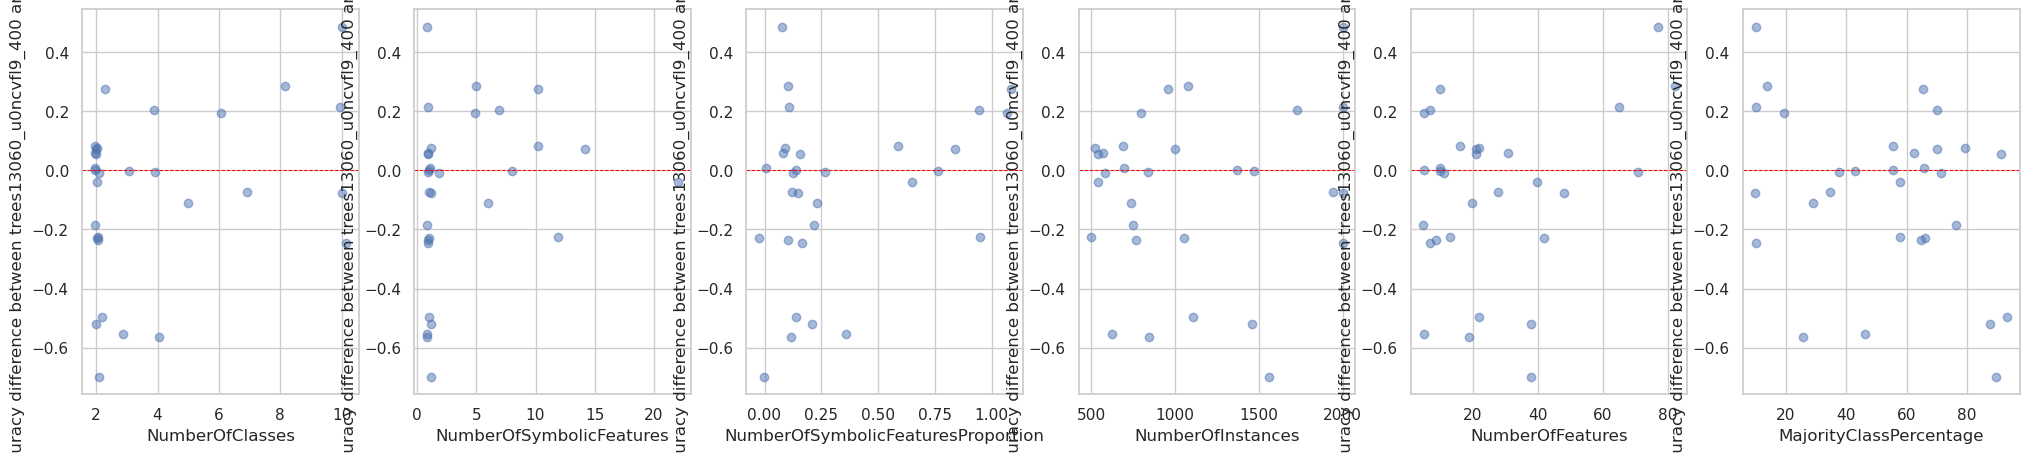

In [233]:
# plot the difference between the models
qualities = ["NumberOfClasses", "NumberOfSymbolicFeatures", "NumberOfSymbolicFeaturesProportion", "NumberOfInstances", "NumberOfFeatures", "MajorityClassPercentage"]
fig, axs = plt.subplots(1, len(qualities), figsize=(25, 5))
for i, quality in enumerate(qualities):
    axs[i].scatter(pivot_df[quality] + np.random.normal(0, 0.1, len(pivot_df)), pivot_df["difference"], alpha=0.5)
    axs[i].set_xlabel(quality)
    axs[i].set_ylabel(f"Accuracy difference between {model_1} and {model_2}")
    # plot a horizontal line at 0
    axs[i].axhline(y=0, color='red', linestyle='--', linewidth=0.7)

In [174]:
from tabpfn import TabPFNClassifier
model = TabPFNClassifier()

Loaded model with parameters: emsize=512, nhead=4, nlayers=12, nhid_factor=2, num_features=100
Using style prior: True
nhead 4
Num workers:  10
{'recompute_attn': True}
Using cpu device
Batch size: 1
Num workers:  10
DataLoader.__dict__ {'num_features': 100, 'num_steps': 8192, 'batch_size': 1, 'eval_pos_seq_len_sampler': <function create_dataloader.<locals>.eval_pos_seq_len_sampler at 0x7fc955f3e310>, 'seq_len_maximum': 10, 'device': 'cpu', 'get_batch_kwargs': {'hyperparameters': {'lr': 0.0001, 'dropout': 0.0, 'emsize': 512, 'batch_size': 1, 'nlayers': 12, 'num_features': 100, 'nhead': 4, 'nhid_factor': 2, 'bptt': 10, 'eval_positions': [972], 'seq_len_used': 50, 'sampling': 'mixed', 'epochs': 400, 'num_steps': 8192, 'verbose': False, 'mix_activations': True, 'nan_prob_unknown_reason_reason_prior': 1.0, 'categorical_feature_p': 0.2, 'nan_prob_no_reason': 0.0, 'nan_prob_unknown_reason': 0.0, 'nan_prob_a_reason': 0.0, 'max_num_classes': 10, 'num_classes': '<function <lambda>.<locals>.<lam

In [69]:
from create_model import load_model_no_train
device = "cuda:0"
checkpoint = "trees73904_ba9wuzhe_390"
model = TabPFNClassifier(device=device, no_preprocess_mode=True)
model_pytorch = load_model_no_train("tabpfn/model_checkpoints", f"model_{checkpoint}.pt", 0, model.c, 0)[0]

Using style prior: True
{'recompute_attn': True}
Using cuda:0 device
Batch size: 1
DataLoader.__dict__ {'num_features': 100, 'num_steps': 8192, 'batch_size': 1, 'eval_pos_seq_len_sampler': <function create_model.<locals>.eval_pos_seq_len_sampler at 0x7efdd4507550>, 'seq_len_maximum': 10, 'device': 'cuda:0', 'get_batch_kwargs': {'hyperparameters': {'lr': 0.0001, 'dropout': 0.0, 'emsize': 512, 'batch_size': 1, 'nlayers': 12, 'num_features': 100, 'nhead': 4, 'nhid_factor': 2, 'bptt': 10, 'eval_positions': [972], 'seq_len_used': 50, 'sampling': 'mixed', 'epochs': 400, 'num_steps': 8192, 'verbose': False, 'mix_activations': True, 'nan_prob_unknown_reason_reason_prior': 1.0, 'categorical_feature_p': 0.2, 'nan_prob_no_reason': 0.0, 'nan_prob_unknown_reason': 0.0, 'nan_prob_a_reason': 0.0, 'max_num_classes': 10, 'num_classes': 2, 'noise_type': 'Gaussian', 'balanced': False, 'normalize_to_ranking': False, 'set_value_to_nan': 0.1, 'normalize_by_used_features': True, 'num_features_used': <functio

In [78]:
# find the number of parameters
s = 0
for name, param in model_pytorch[2].named_parameters():
    print(name, param.numel())
    s += param.numel()
    
print(s / 1e6)

transformer_encoder.layers.0.self_attn.in_proj_weight 786432
transformer_encoder.layers.0.self_attn.in_proj_bias 1536
transformer_encoder.layers.0.self_attn.out_proj.weight 262144
transformer_encoder.layers.0.self_attn.out_proj.bias 512
transformer_encoder.layers.0.linear1.weight 524288
transformer_encoder.layers.0.linear1.bias 1024
transformer_encoder.layers.0.linear2.weight 524288
transformer_encoder.layers.0.linear2.bias 512
transformer_encoder.layers.0.norm1.weight 512
transformer_encoder.layers.0.norm1.bias 512
transformer_encoder.layers.0.norm2.weight 512
transformer_encoder.layers.0.norm2.bias 512
transformer_encoder.layers.1.self_attn.in_proj_weight 786432
transformer_encoder.layers.1.self_attn.in_proj_bias 1536
transformer_encoder.layers.1.self_attn.out_proj.weight 262144
transformer_encoder.layers.1.self_attn.out_proj.bias 512
transformer_encoder.layers.1.linear1.weight 524288
transformer_encoder.layers.1.linear1.bias 1024
transformer_encoder.layers.1.linear2.weight 524288
tr

In [80]:
model.c["num_classes_in_training"]

2

In [81]:
model.c["num_classes"]

2

In [82]:
model.c["max_num_classes"]

10

In [78]:
import numpy as np
def positional_encoding(x, d):
    """
    Positional encoding for the Transformer, 
    directly on the numerical values.
    
    Parameters
    ----------
    x : float
        The input value.
    d : int
        The dimension of the input.
    """
    
    # get the positional encoding
    pos_enc = np.zeros(d)
    for i in range(0, d, 2):
        pos_enc[i] = np.sin(x / 10000 ** (i / d))
        pos_enc[i + 1] = np.cos(x / 10000 ** (i / d))
    
    return pos_enc

In [80]:
def cosine_similarity(x, y):
    """
    Cosine similarity between two vectors.
    
    Parameters
    ----------
    x : numpy array
        The first vector.
    y : numpy array
        The second vector.
    """
    
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [88]:
from tqdm import tqdm
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)

# plot a heatmap of the cosine similarity
heatmap = np.zeros((len(x), len(y)))
for i in tqdm(range(len(x))):
    for j in range(len(y)):
        heatmap[i, j] = cosine_similarity(positional_encoding(x[i], 1000), positional_encoding(y[j], 1000))

100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


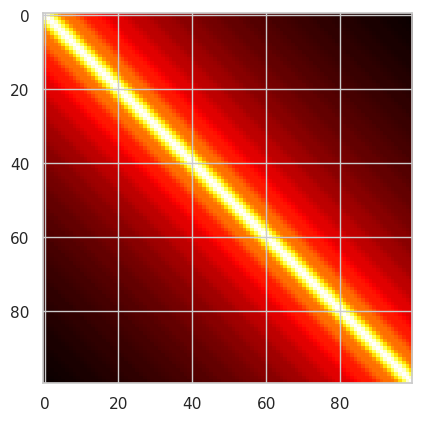

In [89]:
# plot the heatmap
import matplotlib.pyplot as plt
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.show()

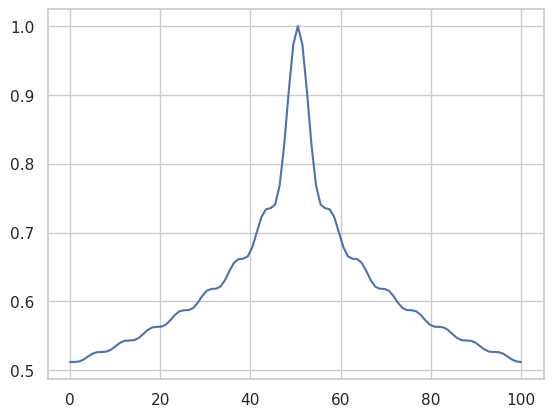

In [90]:
# plot just for x = 50, as a function of y
plt.plot(y, heatmap[50, :])